In [1]:
!bash /home/azureuser/cloudfiles/code/blobfuse/blobfuse_raadsinformatie.sh

In [1]:
import sys
sys.path.append("..")

# Select where to run notebook: "azure" or "local"
my_run = "azure"

# import my_secrets as sc
# import settings as st

if my_run == "azure":
    import config_azure as cf
elif my_run == "local":
    import config as cf


import os
if my_run == "azure":
    if not os.path.exists(cf.HUGGING_CACHE):
        os.mkdir(cf.HUGGING_CACHE)
    os.environ["TRANSFORMERS_CACHE"] = cf.HUGGING_CACHE

# set-up environment - GEITje-7b-chat InContextLearning:
# - install blobfuse -> sudo apt-get install blobfuse
# - pip install transformers
# - pip install torch
# - pip install accelerate
# - pip install jupyter
# - pip install ipywidgets

import pandas as pd

## Notebook overview

*Previous notebook: baseline*

*Next notebook: none, last notebook*

#### Fine-tuning Experiments
- Accuracy scores for each model, and epoch
- Runtime per doc for each model, and 

In [19]:
def average_runtime_per_doc(runtime):
    return round(runtime/1100)

In [39]:
epoch1 = pd.read_pickle(f"{cf.output_path}/predictionsFinal/finetuning/1epochs/overview.pkl")
epoch1['base_model'] = ['Mistral-FT-200T', 'GEITje-FT-200T', 'Llama-FT-200T']
epoch1['epoch'] = 1
epoch2 = pd.read_pickle(f"{cf.output_path}/predictionsFinal/finetuning/2epochs/overview.pkl")
epoch2 = epoch2.drop(index=3)
epoch2['epoch'] = 2
epoch2['base_model'] = ['GEITje-FT-200T', 'Llama-FT-200T', 'Mistral-FT-200T']
epoch3 = pd.read_pickle(f"{cf.output_path}/predictionsFinal/finetuning/3epochs/overview.pkl")
epoch3 = epoch3.drop(index=3)
epoch3['base_model'] = ['Llama-FT-200T', 'Mistral-FT-200T', 'GEITje-FT-200T']
epoch3['epoch'] = 3

overview = pd.concat([epoch1, epoch2, epoch3])
overview['runtime_per_doc'] = overview['runtime'].apply(average_runtime_per_doc)
# display(overview)

# geitje_overview = overview.

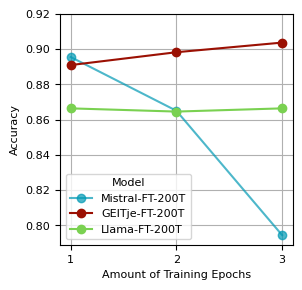

In [50]:
import matplotlib.pyplot as plt

# colors = ['#0099B4B2', '#AA4499', '#7AD151FF']
colors = ['#0099B4B2', '#9B1003', '#7AD151FF']


plt.figure(figsize=(3, 3))
df = overview.copy()
# Loop through each model and plot
for idx, model in enumerate(df['base_model'].unique()):
    model_df = df[df['base_model'] == model]
    plt.plot(model_df['epoch'], model_df['accuracy'], marker='o', label=model, color=colors[idx % len(colors)])

    # for i, acc in enumerate(model_df['accuracy']):
    #     plt.text(model_df['epoch'].iloc[i], acc, f'{acc:.3f}', ha='center', va='bottom')


fs = 8
plt.xticks([1, 2, 3],fontsize=fs)
plt.yticks([0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92], fontsize=fs)
plt.xlabel('Amount of Training Epochs', fontsize=fs)
plt.ylabel('Accuracy', fontsize=fs)
# plt.title('Model Accuracy Over Epochs')
plt.legend(title='Model', fontsize=fs, title_fontsize=fs)
plt.rc('legend', fontsize=fs)

plt.grid(True)
plt.show()

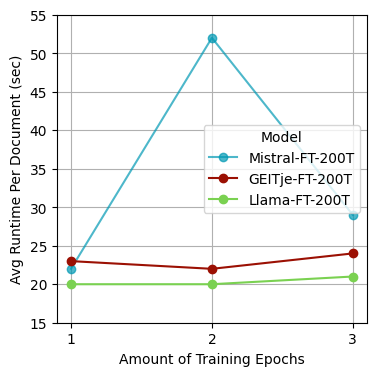

In [43]:
import matplotlib.pyplot as plt

# colors = ['#0099B4B2', '#AA4499', '#7AD151FF']
colors = ['#0099B4B2', '#9B1003', '#7AD151FF']


plt.figure(figsize=(4, 4))
df = overview.copy()
# Loop through each model and plot
for idx, model in enumerate(df['base_model'].unique()):
    model_df = df[df['base_model'] == model]
    plt.plot(model_df['epoch'], model_df['runtime_per_doc'], marker='o', label=model, color=colors[idx % len(colors)])

    # for i, rt in enumerate(model_df['runtime_per_doc']):
    #     plt.text(model_df['epoch'].iloc[i], rt, f'{rt}', ha='center', va='bottom')

plt.xticks([1, 2, 3])
plt.yticks([15,20,25,30,35,40,45,50,55])
plt.xlabel('Amount of Training Epochs')
plt.ylabel('Avg Runtime Per Document (sec)')
# plt.title('Model runtime per doc Over Epochs')
plt.legend(title='Model')
plt.grid(True)
plt.show()